In [481]:
import os
import math
import matplotlib.pyplot as plt
from collections import deque
import time

In [482]:
def visualize_maze(matrix, bonus, start, end, route=None):
    """
    Args:
      1. matrix: The matrix read from the input file,
      2. bonus: The array of bonus points,
      3. start, end: The starting and ending points,
      4. route: The route from the starting point to the ending one, defined by an array of (x, y), e.g. route = [(1, 2), (1, 3), (1, 4)]
    """
    #1. Define walls and array of direction based on the route
    walls=[(i,j) for i in range(len(matrix)) for j in range(len(matrix[0])) if matrix[i][j]=='x']
    
    if route:
        direction=[]
        for i in range(1,len(route)):
            if route[i][0]-route[i-1][0]>0:
                direction.append('v') #^
            elif route[i][0]-route[i-1][0]<0:
                direction.append('^') #v        
            elif route[i][1]-route[i-1][1]>0:
                direction.append('>')
            else:
                direction.append('<')

        direction.pop(0)

    #2. Drawing the map
    ax=plt.figure(dpi=120).add_subplot(111)

    for i in ['top','bottom','right','left']:
        ax.spines[i].set_visible(False)

    plt.scatter([i[1] for i in walls],[-i[0] for i in walls],
                marker='X',s=100,color='black')
    
    plt.scatter([i[1] for i in bonus],[-i[0] for i in bonus],
                marker='P',s=100,color='green')

    plt.scatter(start[1],-start[0],marker='*',
                s=100,color='gold')

    if route:
        for i in range(len(route)-2):
            plt.scatter(route[i+1][1],-route[i+1][0],
                        marker=direction[i],color='silver')

    plt.text(end[1],-end[0],'EXIT',color='red',
         horizontalalignment='center',
         verticalalignment='center')
    plt.xticks([])
    plt.yticks([])
    plt.show()

    print(f'Starting point (x, y) = {start[0], start[1]}')
    print(f'Ending point (x, y) = {end[0], end[1]}')
    
    for _, point in enumerate(bonus):
        print(f'Bonus point at position (x, y) = {point[0], point[1]} with point {point[2]}')


In [483]:
def read_file(file_name: str = 'maze.txt'):
    f=open(file_name,'r')
    n_bonus_points = int(next(f)[:-1])
    bonus_points = []
    for i in range(n_bonus_points):
        x, y, reward = map(int, next(f)[:-1].split(' '))
        bonus_points.append((x, y, reward))

    text=f.read()
    matrix=[list(i) for i in text.splitlines()]
    f.close()

    return bonus_points, matrix

In [484]:
def get_infor_from_matrix(matrix='maze_map.txt'):
    bonus_points, matrix = read_file('maze_map.txt')
    start = 0
    end = 0
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j]=='S':
                start=(i,j)

            elif matrix[i][j]==' ':
                if (i==0) or (i==len(matrix)-1) or (j==0) or (j==len(matrix[0])-1):
                    end=(i,j)

            else:
                pass
    return [bonus_points, matrix, start, end]

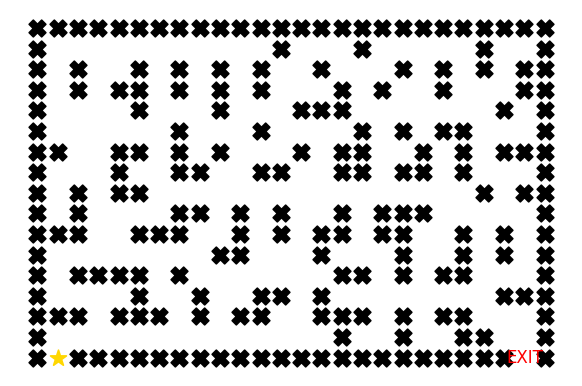

Starting point (x, y) = (16, 1)
Ending point (x, y) = (16, 24)


In [485]:
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x           x   x     x  x\n')
    outfile.write('x x  x x x x  x   x x x xx\n')
    outfile.write('x x xx x x x   x x  x   xx\n')
    outfile.write('x    x   x   xxx       x x\n')
    outfile.write('x      x   x    x x xx   x\n')
    outfile.write('xx  xx x x   x xx  x x xxx\n')
    outfile.write('x   x  xx  xx  xx xx x   x\n')
    outfile.write('x x xx                x xx\n')
    outfile.write('x x    xx x x  x xxx     x\n')
    outfile.write('xxx  xxx  x x xx xx  x x x\n')
    outfile.write('x        xx   x   x  x x x\n')
    outfile.write('x xxxx x       xx x xx   x\n')
    outfile.write('x    x  x  xx x        xxx\n')
    outfile.write('xxx xxx x xx  xxx x xx   x\n')
    outfile.write('x              x  x  xx  x\n')
    outfile.write('xSxxxxxxxxxxxxxxxxxxxxxx x\n')
matrix_6 = get_infor_from_matrix('maze_map.txt')
bonus_points = matrix_6[0]
matrix = matrix_6[1]
start = matrix_6[2]
end = matrix_6[3]
visualize_maze(matrix_6[1],matrix_6[0],matrix_6[2],matrix_6[3])

7.049560546875
188
104


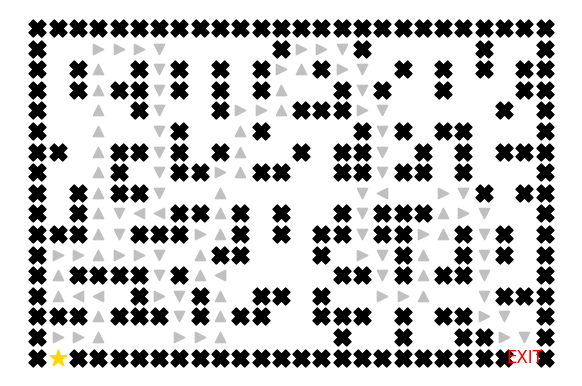

Starting point (x, y) = (16, 1)
Ending point (x, y) = (16, 24)


In [486]:
def dfs_search(matrix, start, end):    
    begin = time.time()
    row = len(matrix)
    col = len(matrix[0])

    x = start[0]
    y = start[1]

    Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    path = []
    stack = []
    stack.append((x,y))
    dfs = {}
    while end not in stack:

        s = stack[-1]
        if s not in path:
            path.append(s)
        #print(f'Curr: {s}')
        for i in range(4) :
            # using the direction array
            a = s[0] + Dir[i][0]
            b = s[1] + Dir[i][1]

            # not blocked and valid
            if(a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) not in path):
                stack.append((a, b))
                dfs[(a,b)] = s
                break
            if(i == 3 ):
                for j in range(4):
                    a1 = s[0] + Dir[j][0] 
                    b1 = s[1] + Dir[j][1]
                    if (a1,b1) in stack:
                        stack.pop()
                        break
    path.append(end)
    p = {}
    cell = end
    while cell != start:
        p[dfs[cell]] = cell 
        cell = dfs[cell]
    final = list(p.values())
    final.append(start)
    finalPath = final[::-1]
    close = time.time()
    print((close-begin)*1000)
    print(len(dfs.keys()))
    print(len(finalPath))
    return finalPath
visualize_maze(matrix,bonus_points,start,end, dfs_search(matrix, start, end))

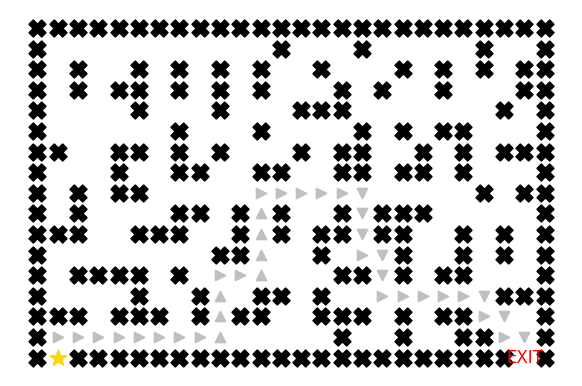

Starting point (x, y) = (16, 1)
Ending point (x, y) = (16, 24)


In [487]:
def bfs_search(matrix, start, end):
    begin = time.time()
    row = len(matrix)
    col = len(matrix[0])

    visited = [[False for i in range(col)]for j in range(row)]
    
    x = start[0]
    y = start[1]

    Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    # Mark the source cell as visited
    visited[x][y] = True
    # Tao dictionary luu vi tri diem cha va diem con
    bfs = {}
    # Create a queue for BFS
    q = deque()

    q.append(start) #  Enqueue source cell

    # Do a BFS starting from source cell
    while q:
        curr = q.popleft() # Dequeue the front cell
        #path.append(curr)
        # If we have reached the destination cell,
        # we are done
        if curr[0] == end[0] and curr[1] == end[1]:
            break

        # Otherwise enqueue its adjacent cells
        for i in range(4):
            a = curr[0] + Dir[i][0]
            b = curr[1] + Dir[i][1]    
        # if adjacent cell is valid, has path 
        # and not visited yet, enqueue it.
            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                visited[a][b] = True
                q.append((a, b))
                bfs[(a,b)] = curr
    p = {}
    cell = end
    while cell != start:
        p[bfs[cell]] = cell 
        cell = bfs[cell]
    final = list(p.values())
    final.append(start)
    finalPath = final[::-1]
    end= time.time() 
    
    return finalPath
visualize_maze(matrix,bonus_points,start,end, bfs_search(matrix, start, end))

In [488]:
def Manhattan(cell1, cell2):
    x1, y1 = cell1
    x2, y2 = cell2
    return (abs(x1 - x2) + abs(y1 - y2))
def Euclid(cell1, cell2):
    x1, y1 = cell1
    x2, y2 = cell2
    return (math.sqrt((x1-x2)**2 + (y1-y2)**2))
def Octile(cell1,cell2):
    x1,y1 = cell1
    x2,y2 = cell2
    dx = abs(x1 - x2)
    dy = abs(y1 - y2)
    return ((dx + dy) + (math.sqrt(2)) * min(dx, dy))

In [489]:
def GBFS_search(matrix, start, end,heuristic): 
    begin = time.time()

    row = len(matrix)
    col = len(matrix[0])

    visited = [[False for i in range(col)]for j in range(row)]

    x = start[0]
    y = start[1]

    Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    path = []
    # Mark the source cell as visited
    visited[x][y] = True
    greedy = {}
    # Create a queue for BFS
    q = deque()

    q.append(start) #  Enqueue source cell

    # Do a BFS starting from source cell
    while q:
        store_dist = {}
        curr = q.popleft() # Dequeue the front cell
        path.append(curr)
        # If we have reached the destination cell,
        # we are done
        if curr[0] == end[0] and curr[1] == end[1]:
            break
        # Otherwise enqueue its adjacent cells
        for i in range(4):
            a = curr[0] + Dir[i][0]
            b = curr[1] + Dir[i][1]    

        # if adjacent cell is valid, has path 
        # and not visited yet, enqueue it.
            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                #calculate distance from point current to end
                dist = heuristic((a,b),end)
                store_dist[(a, b)] = dist
                greedy[(a,b)] = curr
            #select point based on distance array
            if i == 3:
                if store_dist == {}:
                    #if it doesn't quit traverse path to find a new way :v
                    for point in reversed(path):
                        for i in range(4):
                            a = point[0] + Dir[i][0]
                            b = point[1] + Dir[i][1]
                            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                                dist = heuristic((a,b),end)
                                store_dist[(a, b)] = dist  
                                break
                store_dist = dict(sorted(store_dist.items(), key=lambda item: item[1]))
                for key, val in store_dist.items():
                    visited[key[0]][key[1]] = True
                    q.append(key)
                    break
    p = {}
    cell = end
    while cell != start:
        p[greedy[cell]] = cell 
        cell = greedy[cell]
    final = list(p.values())
    final.append(start)
    finalPath = final[::-1]
    close = time.time()

    return [len(greedy.keys()),finalPath,(close-begin)*1000]
def compareHeuristic_Greedy(matrix,bonus_points,start,end):
    len1_search = GBFS_search(matrix, start, end,Manhattan)[0]
    len2_search = GBFS_search(matrix, start, end,Euclid)[0]
    len3_search = GBFS_search(matrix, start, end,Octile)[0]

    len1_path = len(GBFS_search(matrix, start, end,Manhattan)[1])
    len2_path = len(GBFS_search(matrix, start, end,Euclid)[1])
    len3_path = len(GBFS_search(matrix, start, end,Octile)[1])

    time1 = GBFS_search(matrix, start, end,Manhattan)[2]
    time2 = GBFS_search(matrix, start, end,Euclid)[2]
    time3 = GBFS_search(matrix, start, end,Octile)[2]
    print(f'''\tSearch path Length of:
    Manhattan: {len1_search}
    Euclid: {len2_search}
    Octile: {len3_search}''')
    print(f'''\tFinal path Length of:
    Manhattan: {len1_path}
    Euclid: {len2_path}
    Octile: {len3_path}''')
    print(f'''\tRuntime(ms) of:
    Manhattan: {time1}
    Euclid: {time2}
    Octile: {time3}''')
    print('MANHATTAN:')
    visualize_maze(matrix,bonus_points,start,end, GBFS_search(matrix, start, end,Manhattan)[1])
    print('EUCLID:')
    visualize_maze(matrix,bonus_points,start,end, GBFS_search(matrix, start, end,Euclid)[1])
    print('OCTILE:')
    visualize_maze(matrix,bonus_points,start,end, GBFS_search(matrix, start, end,Octile)[1])
#compareHeuristic_Greedy(matrix,bonus_points,start,end)

	Search path Length of:
    Manhattan: 99
    Euclid: 100
    Octile: 113
	Final path Length of:
    Manhattan: 40
    Euclid: 40
    Octile: 40
	Runtime(ms) of:
    Manhattan: 2.340078353881836
    Euclid: 0.7469654083251953
    Octile: 0.7369518280029297
MANHATTAN:


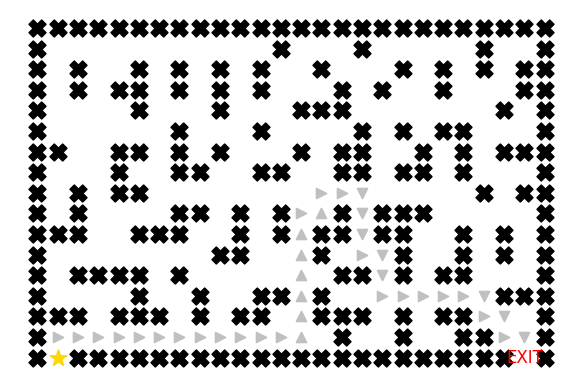

Starting point (x, y) = (16, 1)
Ending point (x, y) = (16, 24)
EUCLID:


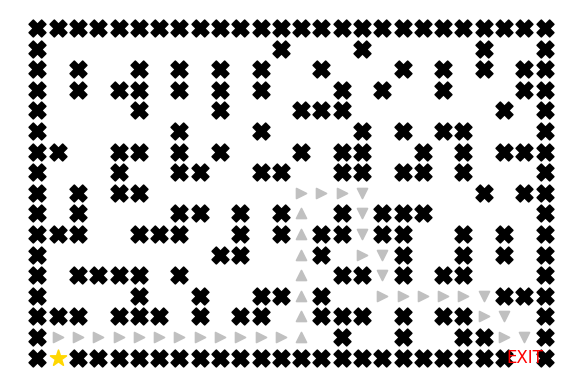

Starting point (x, y) = (16, 1)
Ending point (x, y) = (16, 24)
OCTILE:


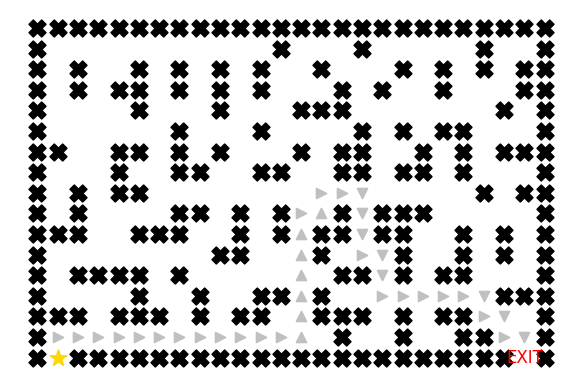

Starting point (x, y) = (16, 1)
Ending point (x, y) = (16, 24)


In [490]:
def aStar_search(matrix, start, end,heuristic): 

    begin = time.time()

    row = len(matrix)
    col = len(matrix[0])
    
    visited = [[False for i in range(col)]for j in range(row)]

    x = start[0]
    y = start[1]

    Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    path = []
    aStar = {}
    # Mark the source cell as visited
    visited[x][y] = True

    # Create a queue for BFS
    q = deque()
    
    q.append(start) #  Enqueue source cell
    store_dist = {}

    # Do a BFS starting from source cell
    while q:
        curr = q.popleft() # Dequeue the front cell
        path.append(curr)
        # If we have reached the destination cell,
        # we are done
        if curr[0] == end[0] and curr[1] == end[1]:
            break

        # Otherwise enqueue its adjacent cells
        for i in range(4):
            a = curr[0] + Dir[i][0]
            b = curr[1] + Dir[i][1]    

        # if adjacent cell is valid, has path 
        # and not visited yet, enqueue it.
            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                #calculate distance from point current to end
#                 dist = heuristic((a,b),end) + + heuristic(start,(a,b))
#                 store_dist[(a, b)] = dist
                dist_end = heuristic((a,b),end)
                dist_start = heuristic(start,(a,b))
                store_dist[(a, b)] = (dist_end + dist_start,dist_end, dist_start)
                aStar[(a,b)] = curr
            #select point based on distance array
            if i == 3:
                if store_dist == {}:
                    #if it doesn't quit traverse path to find a new way :v
                    for point in reversed(path):
                        for i in range(4):
                            a = point[0] + Dir[i][0]
                            b = point[1] + Dir[i][1]
                            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
#                                 dist = heuristic((a,b),end) + heuristic(start,(a,b))
#                                 store_dist[(a, b)] = dist
                                dist_end = heuristic((a,b),end)
                                dist_start = heuristic(start,(a,b))
                                store_dist[(a, b)] = (dist_end + dist_start,dist_end, dist_start)
                                break
                #store_dist = dict(sorted(store_dist.items(), key=lambda item: item[1]))
                store_dist = dict(sorted(store_dist.items(), key=lambda item: (item[1][0], item[1][1])))
                for key, val in store_dist.items():
                    visited[key[0]][key[1]] = True
                    q.append(key)
                    store_dist.pop(key)
                    break
    p = {}
    cell = end
    while cell != start:
        p[aStar[cell]] = cell 
        cell = aStar[cell]
    final = list(p.values())
    final.append(start)
    finalPath = final[::-1]
    
    close = time.time()

    return [len(aStar.keys()),finalPath,(close-begin)*1000]

def compareHeuristic_AStar(matrix,bonus_points,start,end):
    len1_search = aStar_search(matrix, start, end,Manhattan)[0]
    len2_search = aStar_search(matrix, start, end,Euclid)[0]
    len3_search = aStar_search(matrix, start, end,Octile)[0]

    len1_path = len(aStar_search(matrix, start, end,Manhattan)[1])
    len2_path = len(aStar_search(matrix, start, end,Euclid)[1])
    len3_path = len(aStar_search(matrix, start, end,Octile)[1])

    time1 = aStar_search(matrix, start, end,Manhattan)[2]
    time2 = aStar_search(matrix, start, end,Euclid)[2]
    time3 = aStar_search(matrix, start, end,Octile)[2]
    print(f'''\tSearch path Length of:
    Manhattan: {len1_search}
    Euclid: {len2_search}
    Octile: {len3_search}''')
    print(f'''\tFinal path Length of:
    Manhattan: {len1_path}
    Euclid: {len2_path}
    Octile: {len3_path}''')
    print(f'''\tRuntime(ms) of:
    Manhattan: {time1}
    Euclid: {time2}
    Octile: {time3}''')
    print('MANHATTAN:')
    visualize_maze(matrix,bonus_points,start,end, aStar_search(matrix, start, end,Manhattan)[1])
    print('EUCLID:')
    visualize_maze(matrix,bonus_points,start,end, aStar_search(matrix, start, end,Euclid)[1])
    print('OCTILE:')
    visualize_maze(matrix,bonus_points,start,end, aStar_search(matrix, start, end,Octile)[1])
compareHeuristic_AStar(matrix,bonus_points,start,end)

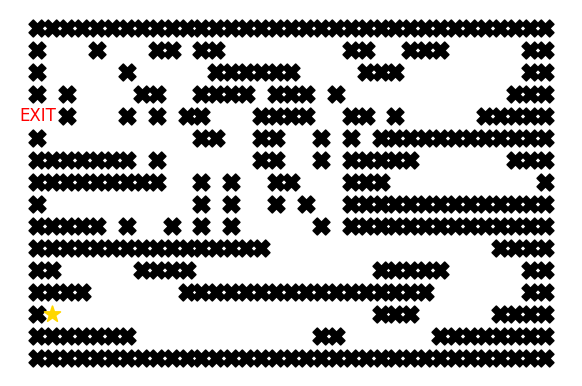

Starting point (x, y) = (13, 1)
Ending point (x, y) = (4, 0)


In [491]:
#map 1
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx xx        xx  xxx     xx\n')
    outfile.write('x     x     xxxxxx    xxx        xx\n')
    outfile.write('x x   +xx  xxxx xxx x           xxx\n')
    outfile.write('  x   x x xx   xxxx  xx x     xxxxx\n')
    outfile.write('x          xx +xx  x x xxxxxxxxxxxx\n')
    outfile.write('xxxxxxx x      xx  x xxxxx      xxx\n')
    outfile.write('xxxxxxxxx  x x  xx   xxx          x\n')
    outfile.write('x          x x  x x  xxxxxxxxxxxxxx\n')
    outfile.write('xxxxx x  x x x     x xxxxxxxxxxxxxx\n')
    outfile.write('xxxxxxxxxxxxxxxx               xxxx\n')
    outfile.write('xx     xxxx            xxxxx     xx\n')
    outfile.write('xxxx      xxxxxxxxxxxxxxxxx      xx\n')
    outfile.write('xS                     xxx     xxxx\n')
    outfile.write('xxxxxxx            xx      xxxxxxxx\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
matrix_1 = get_infor_from_matrix('maze_map.txt')
bonus_points = matrix_1[0]
matrix = matrix_1[1]
start = matrix_1[2]
end = matrix_1[3]
visualize_maze(matrix_1[1],matrix_1[0],matrix_1[2],matrix_1[3])

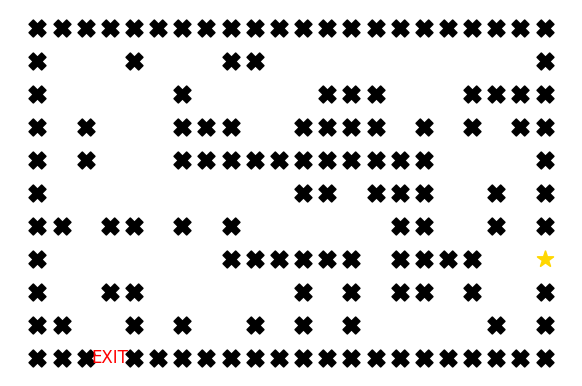

Starting point (x, y) = (7, 21)
Ending point (x, y) = (10, 3)


In [492]:
#map 2
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx           x\n')
    outfile.write('x     x     xxx   xxxx\n')
    outfile.write('x x   xxx  xxxx x x xx\n')
    outfile.write('x x   xxxxxxxxxxx    x\n')
    outfile.write('x          xx xxx  x x\n')
    outfile.write('xx xx x x      xx  x x\n')
    outfile.write('x       xxxxxx xxxx  S\n')
    outfile.write('x  xx      x x xx x  x\n')
    outfile.write('xx  x x  x x x     x x\n')
    outfile.write('xxx xxxxxxxxxxxxxxxxxx')
matrix_2 = get_infor_from_matrix('maze_map.txt')
bonus_points = matrix_2[0]
matrix = matrix_2[1]
start = matrix_2[2]
end = matrix_2[3]
visualize_maze(matrix_2[1],matrix_2[0],matrix_2[2],matrix_2[3])

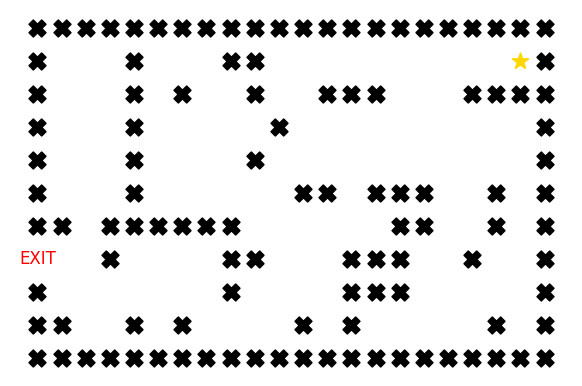

Starting point (x, y) = (1, 20)
Ending point (x, y) = (7, 0)


In [493]:
#map 3
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx          Sx\n')
    outfile.write('x   x x  x  xxx   xxxx\n')
    outfile.write('x   x     x          x\n')
    outfile.write('x   x    x           x\n')
    outfile.write('x   x      xx xxx  x x\n')
    outfile.write('xx xxxxxx      xx  x x\n')
    outfile.write('   x    xx   xxx  x  x\n')
    outfile.write('x       x    xxx     x\n')
    outfile.write('xx  x x    x x     x x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')
matrix_3 = get_infor_from_matrix('maze_map.txt')
bonus_points = matrix_3[0]
matrix = matrix_3[1]
start = matrix_3[2]
end = matrix_3[3]
visualize_maze(matrix_3[1],matrix_3[0],matrix_3[2],matrix_3[3])

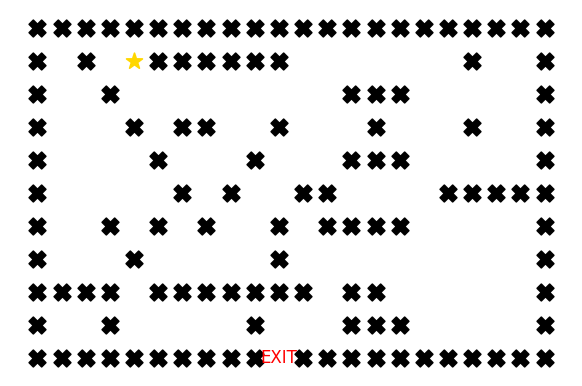

Starting point (x, y) = (1, 4)
Ending point (x, y) = (10, 10)


In [494]:
#map 4
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x x Sxxxxxx       x  x\n')
    outfile.write('x  x         xxx     x\n')
    outfile.write('x   x xx  x   x   x  x\n')
    outfile.write('x    x   x   xxx     x\n')
    outfile.write('x     x x  xx    xxxxx\n')
    outfile.write('x  x x x  x xxxx     x\n')
    outfile.write('x   x     x          x\n')
    outfile.write('xxxx xxxxxxx xx      x\n')
    outfile.write('x  x     x   xxx     x\n')
    outfile.write('xxxxxxxxxx xxxxxxxxxxx')
matrix_4 = get_infor_from_matrix('maze_map.txt')
bonus_points = matrix_4[0]
matrix = matrix_4[1]
start = matrix_4[2]
end = matrix_4[3]
visualize_maze(matrix_4[1],matrix_4[0],matrix_4[2],matrix_4[3])

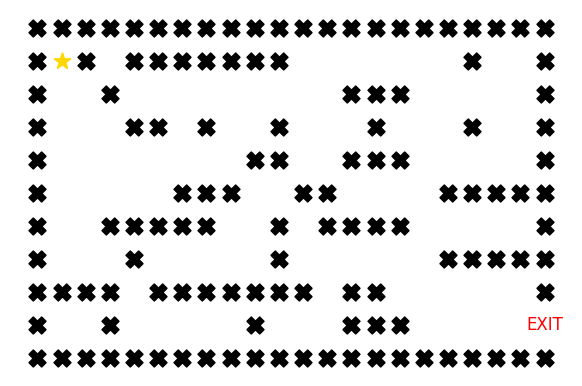

Starting point (x, y) = (1, 1)
Ending point (x, y) = (9, 21)


In [495]:
#map 5
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('xSx xxxxxxx       x  x\n')
    outfile.write('x  x         xxx     x\n')
    outfile.write('x   xx x  x   x   x  x\n')
    outfile.write('x        xx  xxx     x\n')
    outfile.write('x     xxx  xx    xxxxx\n')
    outfile.write('x  xxxxx  x xxxx     x\n')
    outfile.write('x   x     x      xxxxx\n')
    outfile.write('xxxx xxxxxxx xx      x\n')
    outfile.write('x  x     x   xxx      \n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')
matrix_5 = get_infor_from_matrix('maze_map.txt')
bonus_points = matrix_5[0]
matrix = matrix_5[1]
start = matrix_5[2]
end = matrix_5[3]
visualize_maze(matrix_5[1],matrix_5[0],matrix_5[2],matrix_5[3])

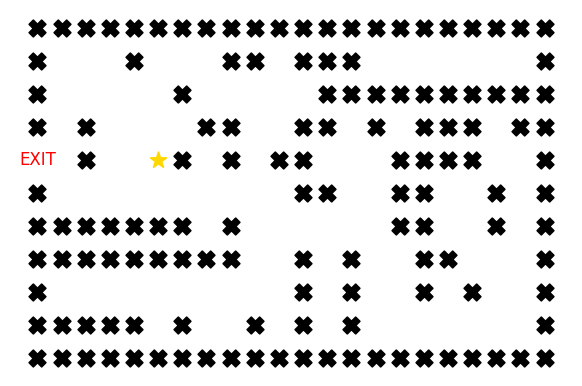

Starting point (x, y) = (4, 5)
Ending point (x, y) = (4, 0)


In [496]:
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 14 -1\n')
#     outfile.write('6 14 -1\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx xxx       x\n')
    outfile.write('x     x     xxxxxxxxxx\n')
    outfile.write('x x    xx  xx x xxx xx\n')
    outfile.write('  x  Sx x xx   xxxx  x\n')
    outfile.write('x          xx  xx  x x\n')
    outfile.write('xxxxxxx x      xx  x x\n')
    outfile.write('xxxxxxxxx  x x  xx   x\n')
    outfile.write('x          x x  x x  x\n')
    outfile.write('xxxxx x  x x x       x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')
matrix_1 = get_infor_from_matrix('maze_map.txt')
bonus_points = matrix_1[0]
matrix = matrix_1[1]
start = matrix_1[2]
end = matrix_1[3]
visualize_maze(matrix_1[1],matrix_1[0],matrix_1[2],matrix_1[3])

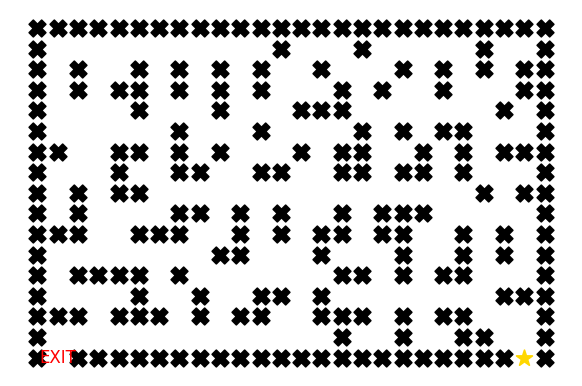

Starting point (x, y) = (16, 24)
Ending point (x, y) = (16, 1)


In [497]:
with open('maze_map.txt', 'w') as outfile:
    outfile.write('0\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x           x   x     x  x\n')
    outfile.write('x x  x x x x  x   x x x xx\n')
    outfile.write('x x xx x x x   x x  x   xx\n')
    outfile.write('x    x   x   xxx       x x\n')
    outfile.write('x      x   x    x x xx   x\n')
    outfile.write('xx  xx x x   x xx  x x xxx\n')
    outfile.write('x   x  xx  xx  xx xx x   x\n')
    outfile.write('x x xx                x xx\n')
    outfile.write('x x    xx x x  x xxx     x\n')
    outfile.write('xxx  xxx  x x xx xx  x x x\n')
    outfile.write('x        xx   x   x  x x x\n')
    outfile.write('x xxxx x       xx x xx   x\n')
    outfile.write('x    x  x  xx x        xxx\n')
    outfile.write('xxx xxx x xx  xxx x xx   x\n')
    outfile.write('x              x  x  xx  x\n')
    outfile.write('x xxxxxxxxxxxxxxxxxxxxxxSx\n')
matrix_6 = get_infor_from_matrix('maze_map.txt')
bonus_points = matrix_6[0]
matrix = matrix_6[1]
start = matrix_6[2]
end = matrix_6[3]
visualize_maze(matrix_6[1],matrix_6[0],matrix_6[2],matrix_6[3])

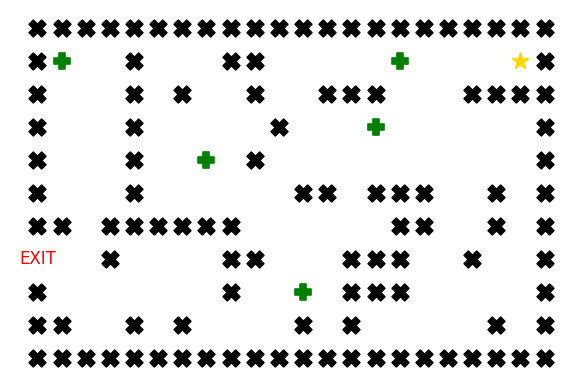

Starting point (x, y) = (1, 20)
Ending point (x, y) = (7, 0)
Bonus point at position (x, y) = (3, 14) with point -4
Bonus point at position (x, y) = (1, 15) with point -6
Bonus point at position (x, y) = (1, 1) with point -1
Bonus point at position (x, y) = (4, 7) with point -9
Bonus point at position (x, y) = (8, 11) with point -2


In [657]:
#map 3
with open('maze_map.txt', 'w') as outfile:
    outfile.write('5\n')
#     outfile.write('3 6 -3\n')
#     outfile.write('5 17 -5\n')
    outfile.write('3 14 -4\n')
    outfile.write('1 15 -6\n')
    outfile.write('1 1 -1\n')
    outfile.write('4 7 -9\n')
    outfile.write('8 11 -2\n')
#     outfile.write('3 2 -7\n')
#     outfile.write('8 7 -8\n')
#     outfile.write('9 2 -10\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx\n')
    outfile.write('x   x   xx          Sx\n')
    outfile.write('x   x x  x  xxx   xxxx\n')
    outfile.write('x   x     x          x\n')
    outfile.write('x   x    x           x\n')
    outfile.write('x   x      xx xxx  x x\n')
    outfile.write('xx xxxxxx      xx  x x\n')
    outfile.write('   x    xx   xxx  x  x\n')
    outfile.write('x       x    xxx     x\n')
    outfile.write('xx  x x    x x     x x\n')
    outfile.write('xxxxxxxxxxxxxxxxxxxxxx')
matrix_8 = get_infor_from_matrix('maze_map.txt')
bonus_points = matrix_8[0]
matrix = matrix_8[1]
start = matrix_8[2]
end = matrix_8[3]
visualize_maze(matrix_8[1],matrix_8[0],matrix_8[2],matrix_8[3])

row = len(matrix)
col = len(matrix[0])
def init_weights(matrix):
    weights = [[1 for i in range(col)]for j in range(row)]
    for k in bonus_points:
        weights[k[0]][k[1]] = k[2]
    return weights
weights = init_weights(matrix)


[(1, 20)]
(1, 20)
bfs[(1, 19)] = (1, 20)
{(1, 19): 20.924858845171276}

[(1, 20), (1, 19)]
(1, 19)
bfs[(1, 18)] = (1, 19)
{(1, 18): 19.973665961010276}

[(1, 20), (1, 19), (1, 18)]
(1, 18)
bfs[(1, 17)] = (1, 18)
{(1, 17): 19.027756377319946}

[(1, 20), (1, 19), (1, 18), (1, 17)]
(1, 17)
bfs[(1, 16)] = (1, 17)
bfs[(2, 17)] = (1, 17)
{(1, 16): 18.08800749063506, (2, 17): 18.72004514666935}

[(1, 20), (1, 19), (1, 18), (1, 17), (1, 16)]
(1, 16)
bfs[(1, 15)] = (1, 16)
bfs[(2, 16)] = (1, 16)
{(1, 15): 10.15549442140351, (2, 16): 17.76305461424021}

[(1, 20), (1, 19), (1, 18), (1, 17), (1, 16), (1, 15)]
(1, 15)
bfs[(1, 14)] = (1, 15)
bfs[(2, 15)] = (1, 15)
{(1, 14): 16.231546211727817, (2, 15): 16.811388300841898}

[(1, 20), (1, 19), (1, 18), (1, 17), (1, 16), (1, 15), (1, 14)]
(1, 14)
bfs[(1, 13)] = (1, 14)
{(1, 13): 15.317821063276353}

[(1, 20), (1, 19), (1, 18), (1, 17), (1, 16), (1, 15), (1, 14), (1, 13)]
(1, 13)
bfs[(1, 12)] = (1, 13)
{(1, 12): 14.416407864998739}

[(1, 20), (1, 19), 

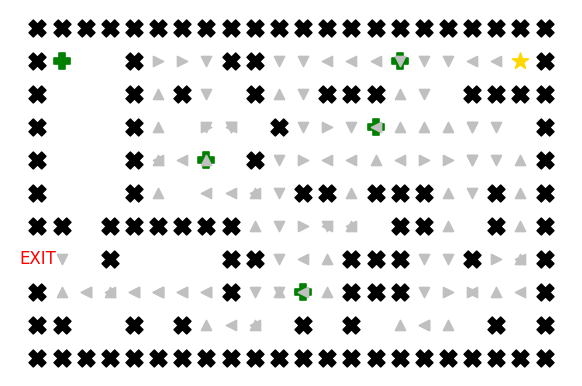

Starting point (x, y) = (1, 20)
Ending point (x, y) = (7, 0)
Bonus point at position (x, y) = (3, 14) with point -4
Bonus point at position (x, y) = (1, 15) with point -6
Bonus point at position (x, y) = (1, 1) with point -1
Bonus point at position (x, y) = (4, 7) with point -9
Bonus point at position (x, y) = (8, 11) with point -2


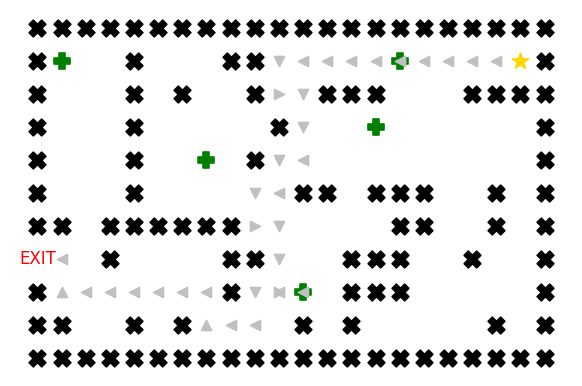

Starting point (x, y) = (1, 20)
Ending point (x, y) = (7, 0)
Bonus point at position (x, y) = (3, 14) with point -4
Bonus point at position (x, y) = (1, 15) with point -6
Bonus point at position (x, y) = (1, 1) with point -1
Bonus point at position (x, y) = (4, 7) with point -9
Bonus point at position (x, y) = (8, 11) with point -2


In [658]:

row = len(matrix)
col = len(matrix[0])

visited = [[False for i in range(col)]for j in range(row)]

x = start[0]
y = start[1]


Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
bfs = {}
bfs_length = {}
path = []
# Mark the source cell as visited
visited[x][y] = True
     
# Create a queue for BFS
q = deque()
     
q.append(start) #  Enqueue source cell
#store_dist = {}
# Do a BFS starting from source cell
while q:
    print()

    store_dist = {}
    curr = q.popleft() # Dequeue the front cell
    path.append(curr)
    # If we have reached the destination cell,
    # we are done
    if curr[0] == end[0] and curr[1] == end[1]:
        break
    print(path)
    print(curr)
    # Otherwise enqueue its adjacent cells
    for i in range(4):
        a = curr[0] + Dir[i][0]
        b = curr[1] + Dir[i][1]    
        
    # if adjacent cell is valid, has path 
    # and not visited yet, enqueue it.
        if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
            dist = math.sqrt((a-end[0])**2 + (b-end[1])**2)
            store_dist[(a, b)] = weights[a][b] + dist
            print(f'bfs[{(a,b)}] = {curr}')
            bfs[(a, b)] = curr
            #select point based on distance array
        if i == 3:
            if store_dist == {}:
                print(f'Append: {bfs[curr]}')
                q.append(bfs[curr])
                continue
                #if it doesn't quit traverse path to find a new way :v
#                 for point in reversed(bfs.values()):
#                     print(point,end=' - ')
#                 for point in reversed(bfs.values()):
#                     for i in range(4):
#                         a = point[0] + Dir[i][0]
#                         b = point[1] + Dir[i][1]
#                         if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
#                             dist = math.sqrt((a-end[0])**2 + (b-end[1])**2)
#                             store_dist[(a, b)] = weights[a][b] + dist
                
            print(store_dist)
            store_dist = dict(sorted(store_dist.items(), key=lambda item: item[1]))
            if len(store_dist.values()) > 1 and len(set(store_dist.values())) == 1:
                for key, val in store_dist.items():
                    bfs_length[key] = len(bfs_search(matrix,key,end))
                bfs_length = dict(sorted(bfs_length.items(), key=lambda item: item[1]))
                for k,length in bfs_length.items():
                    visited[k[0]][k[1]] = True
                    q.append(k)
                    #store_dist.pop(k)
                    break
            else:
                for key, val in store_dist.items():
                    visited[key[0]][key[1]] = True
                    q.append(key)
                    #store_dist.pop(key)
                    break
print(bfs)
p = {}
cell = end
while cell != start:
    print(cell)
    p[bfs[cell]] = cell 
    print(bfs[cell])
    cell = bfs[cell]
    for key,val in bfs.items():
        if val == cell and key not in p.keys() and weights[key[0]][key[1]] < 0:
            print('Key:')
            print(key)
            p[key] = cell
            p[str(key)+'-sub'] = key
            break
    print()
final = list(p.values())
final.append(start)
finalPath = final[::-1]
print(finalPath)
cost = 0
for x in finalPath[1:]:
    cost += weights[x[0]][x[1]]
print(len(bfs.values()))
print(cost)
visualize_maze(matrix,bonus_points,start,end, list(bfs.values()))
visualize_maze(matrix,bonus_points,start,end, finalPath)

## Using triangle distance

In [659]:
def Astar_bonus(matrix, start, end, heuristic):
    row = len(matrix)
    col = len(matrix[0])

    visited = [[False for i in range(col)]for j in range(row)]

    x = start[0]
    y = start[1]


    Dir = [[-1, 0], [0, -1], [1, 0], [0, 1]]
    bfs = {}
    bfs_length = {}
    path = []
    # Mark the source cell as visited
    visited[x][y] = True

    # Create a queue for BFS
    q = deque()

    q.append(start) #  Enqueue source cell
    #store_dist = {}
    # Do a BFS starting from source cell
    while q:

        store_dist = {}
        curr = q.popleft() # Dequeue the front cell
        path.append(curr)
        # If we have reached the destination cell,
        # we are done
        if curr[0] == end[0] and curr[1] == end[1]:
            break
        # Otherwise enqueue its adjacent cells
        for i in range(4):
            a = curr[0] + Dir[i][0]
            b = curr[1] + Dir[i][1]    

        # if adjacent cell is valid, has path 
        # and not visited yet, enqueue it.
            if (a >= 0 and b >= 0 and a < row and b < col and matrix[a][b] != 'x' and (a, b) and not visited[a][b]):
                dist = math.sqrt((a-end[0])**2 + (b-end[1])**2)
                store_dist[(a, b)] = weights[a][b] + dist
                bfs[(a, b)] = curr
                #select point based on distance array
            if i == 3:
                if store_dist == {}:
                    q.append(bfs[curr])
                    continue
                store_dist = dict(sorted(store_dist.items(), key=lambda item: item[1]))
                if len(store_dist.values()) > 1 and len(set(store_dist.values())) == 1:
                    for key, val in store_dist.items():
                        bfs_length[key] = len(bfs_search(matrix,key,end))
                    bfs_length = dict(sorted(bfs_length.items(), key=lambda item: item[1]))
                    for k,length in bfs_length.items():
                        visited[k[0]][k[1]] = True
                        q.append(k)
                        #store_dist.pop(k)
                        break
                else:
                    for key, val in store_dist.items():
                        visited[key[0]][key[1]] = True
                        q.append(key)
                        #store_dist.pop(key)
                        break
    p = {}
    cell = end
    while cell != start:
        p[bfs[cell]] = cell 
        cell = bfs[cell]
        for key,val in bfs.items():
            if val == cell and key not in p.keys() and weights[key[0]][key[1]] < 0:
                p[key] = cell
                p[str(key)+'-sub'] = key
                break
    final = list(p.values())
    final.append(start)
    finalPath = final[::-1]
    return finalPath

In [660]:
#calculate and shorted distance from start to all bonus point
def sort_bonus_point(bonus_points):
    store_dist_from_start = {}
    for point in bonus_points:
        store_dist_from_start[point[:2]] = Euclid(start, point[:2])

    store_dist_from_start = dict(sorted(store_dist_from_start.items(), key=lambda item: item[1]))
    return store_dist_from_start

In [661]:
def cost_func(dist):
    weights = init_weights(matrix)
    finalPath = dist
    cost = 0
    for x in finalPath[1:]:
        cost += weights[x[0]][x[1]]
        weights[x[0]][x[1]] = 1
    return cost

In [662]:
def all_real_cost(bonus_points):
    store_dist_from_start = sort_bonus_point(bonus_points)
    #calculate all real cost from A to B point
    
    #first from start point
    start_dist = {}
    for point in store_dist_from_start.keys():
        dist_from_start = aStar_search(matrix, start, point, Euclid)
        start_dist[(start, point)] = cost_func(dist_from_start[1])

    #second point to point
    points_dist = {}
    for i, point_i in enumerate(list(store_dist_from_start.keys())):
        for j, point_j in enumerate(list(store_dist_from_start.keys())):
            if i != j:
                dist_from_point = aStar_search(matrix, point_i, point_j, Euclid)
                points_dist[(point_i, point_j)] = cost_func(dist_from_point[1])

    #third point to end
    end_dist = {}
    for point in store_dist_from_start.keys():
        dist_from_start = aStar_search(matrix, point, end, Euclid)
        end_dist[(point, end)] = cost_func(dist_from_start[1])

    #last start to end
    dist_from_start = aStar_search(matrix, start, end, Euclid)
    start_end_dist = {}
    start_end_dist[(start, end)] = cost_func(dist_from_start[1])

    points_dist.update(start_dist)
    points_dist.update(end_dist)
    return [points_dist, start_end_dist]
points_dist = all_real_cost(bonus_points)[0]
start_end_dist = all_real_cost(bonus_points)[1]

In [663]:
def sort_distance():
    # sorted distance
    points_dist = all_real_cost(bonus_points)[0]
    points_dist = dict(sorted(points_dist.items(), key=lambda item: item[1]))
    return points_dist
points_dist = sort_distance()

In [664]:
def triangle_distance():
    # using triangle distance
    G_cost = 0 #cost from start to point
    H_cost = 0 #cost from point to end
    start_end_cost =  list(all_real_cost(bonus_points)[1].values())[0]  #cost from start to end

    start_point = start
    # first point
    store_point_path = []
    for point in bonus_points:
        G_cost = points_dist[(start_point, point[:2])]
        H_cost = points_dist[(point[:2], end)]

        if G_cost + H_cost < start_end_cost:
            store_point_path.append(point[:2])
            start_point = point[:2]
            start_end_cost = H_cost 
    return store_point_path
store_point_path = triangle_distance()
store_point_path

[(1, 15), (4, 7), (8, 11)]

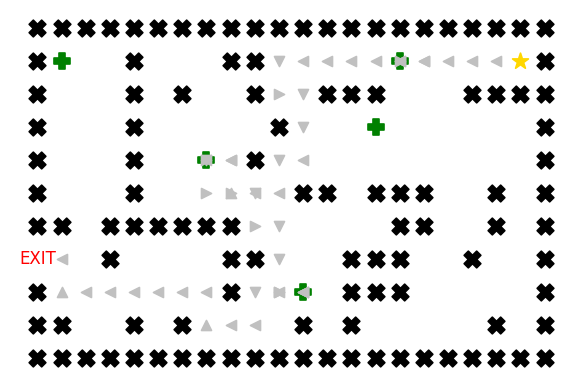

Starting point (x, y) = (1, 20)
Ending point (x, y) = (7, 0)
Bonus point at position (x, y) = (3, 14) with point -4
Bonus point at position (x, y) = (1, 15) with point -6
Bonus point at position (x, y) = (1, 1) with point -1
Bonus point at position (x, y) = (4, 7) with point -9
Bonus point at position (x, y) = (8, 11) with point -2
19


In [665]:
def shortest_path():
    #try to go store_point_path
    first = start
    second = end
    path = []
    for point in store_point_path:
        second = point
        path += Astar_bonus(matrix, first, second, Euclid)
        #recover weights
        for bonus in bonus_points:
            if bonus[:2] in path:
                weights[bonus[:2][0]][bonus[:2][1]] = 1
        first = point

    second = end
    path += Astar_bonus(matrix, first, second, Euclid)
    return path
    
shortest_path = shortest_path()
visualize_maze(matrix,bonus_points,start,end, shortest_path)
#cost path
print(cost_func(shortest_path))